## Task 1: Exploratory Data Analysis (EDA) and Business Insights

### Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [2]:
# Display the first few rows of each dataframe
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

### Data Cleaning


In [3]:
# Check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Performing EDA

In [4]:
# Convert TransactionDate to datetime format and extract month/year for analysis
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')

In [5]:
# Aggregate total sales value by month
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

### Distribution of Customer Demographics


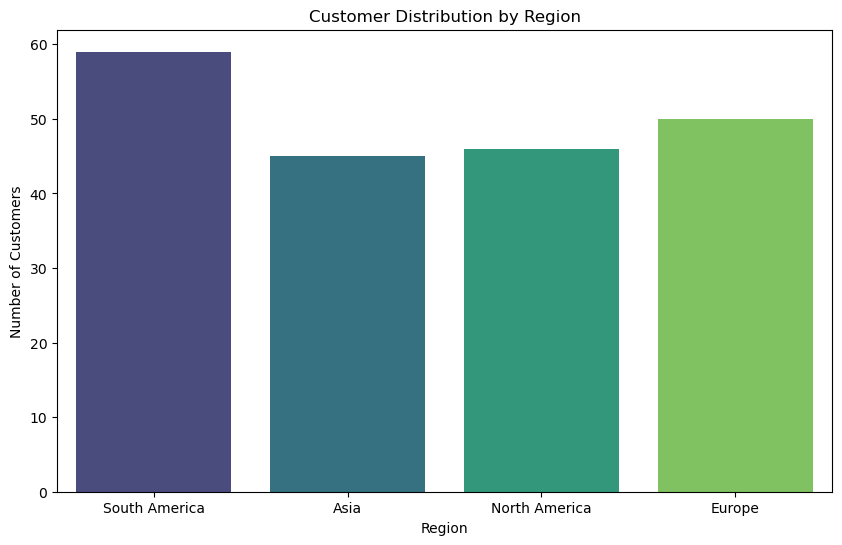

In [6]:

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

### Monthly Sales Trends Over Time

In [7]:
# Convert TotalValue to numeric, forcing errors to NaN
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')

# Check for any NaN values created during conversion
print(transactions['TotalValue'].isnull().sum())


0


In [8]:
# Converting Month to string for plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Ensuring TotalValue is numeric
monthly_sales['TotalValue'] = pd.to_numeric(monthly_sales['TotalValue'], errors='coerce')

# Check for NaN values after conversion
print(monthly_sales.isnull().sum())


Month         0
TotalValue    0
dtype: int64


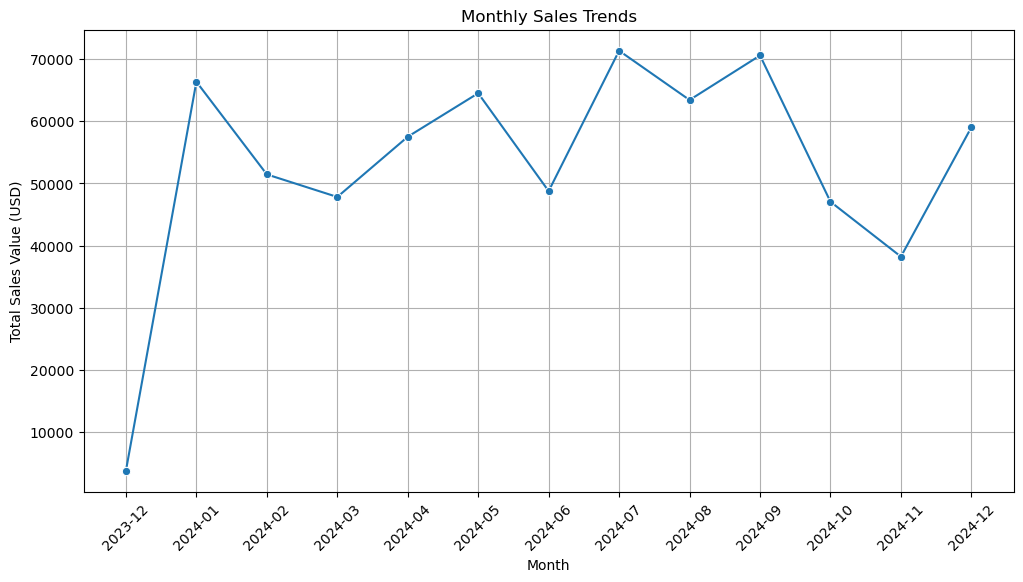

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.grid()
plt.show()

### Average Transaction Value by Customer Segments

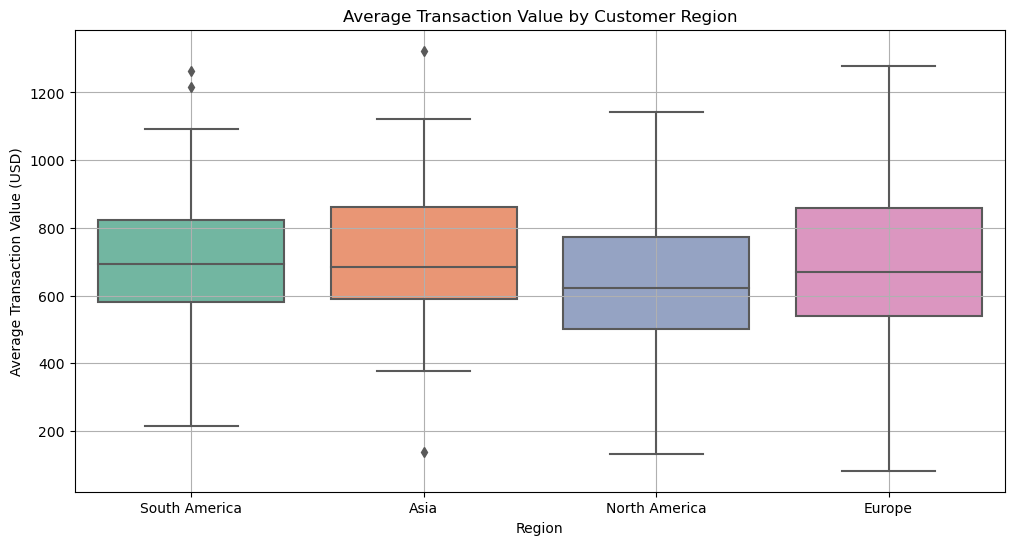

In [10]:
avg_transaction_value = transactions.groupby('CustomerID')['TotalValue'].mean().reset_index()
customer_avg_value = avg_transaction_value.merge(customers, on='CustomerID')

plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_avg_value, x='Region', y='TotalValue', palette='Set2')
plt.title('Average Transaction Value by Customer Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.grid()
plt.show()
